<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/BatchNormalization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Batch Normalization-**

It is an algorithmic method which makes the training of Deep Neural Network faster and more stable.Fast training means you converge to the right optimal solution with less number of epochs.

When we give data to the deep neural network, it is generally normalized which means it has mean as 0 and standard deviation as 1. The output of node in 1st hidden layer(activation of node in 1st hidden layer) is the input to the node in second hidden layer.So we need to make sure that the output(activation) of this node in first hidden layer should also be normalized and this is what exactly batch normalization do.And we do this batch normalization for each and every node output in hidden layers.By doing this the training becomes fast and stable.

**Why Batch Normalization is needed?**

It is advised that when you are working with neural network model,you should normalize the inputs which means the mean should be 0 and standard deviation should be 1.

WHat ppl thought is when you are giving input to the neural network's input layer,you are normalizing the input which gives better resuls. What if we normalize the activation of the each neuron in hidden layer which is input to the next hidden layer's neuron, that might work better. So this is the reason why normalization is needed.

**Covariate Shift:**

Consider you have regression problem of prediction house price of city A and we built a regression model on city A data.If we later test this model on data from city B , where house size and incomes follow a different distribution , our model might underperform. The relationship between house features and prices is the same but the input distribution has shifted.  This shift in data is known as Covariate Shift.

**Internal Covariate Shift-**

ICS occurs when the distribution of activations of intermediate layer outputs changes during training,causing instability in learning.This forces the network to continuously adopt to shifting distributions , slowing down convergence and making training harder.


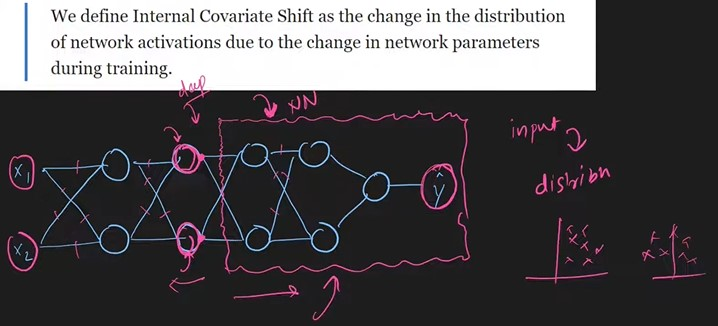


Consider the above neural network,we have x1 and x2 as input to the network. y-hat is the output of the network. There are 4 hidden layers in the network.When we give data (x1 and x2) to the network, it is in normalized(mean =0 and standard deviation = 1) form.

Now forget the first 2 hidden layer and focus on the 3rd and 4th hidden layer and output y-hat which is boxed in pink color.So input to the boxed neural network is activations of neurons in 2nd hidden layer.This activation is continuously changeing because weight value is continuously changing so this 3rd hidden layer gets the input in different distribution in form of activation of 2nd hidden layer. Due to this inconsistency , it is very difficult for the boxed neural network to train properly  and this is exactly called internal covariate shift.

What batch normalization makes sure that at every node in every hidden layer, whatever activation is coming out , it is normalized with mean as 0 and standard deviation as 1.This helps the next hidden layer to get normalized activation from previous layer and gets the stable ground to do their work and training gets improvd.

If there is internal covariate shift in the model and you are not using batch normalization then you have to go with lower value of learning rate then only training will be done stabaly.

**How Batch Normalization Works?**


Batch normaliztion is applied on layer-by-layer basis wherein you can decide where and on which layer you want to apply batch normalization and where and on which layer you dont want to apply batch normalization.

When you apply batch normalization you apply it on mini-batch gradient descent
We define the mini-batch size let 4. We send 4 points from dataset to the neural network.If we have 2 nodes in hidden layer then we will have 4 activations for first node and 4 activation for second node.Now we will calculate mean (μ)and standard deviation(σ) for first and second node separately.NOw we will apply the folowing formula to each 4 activationa for both first and second node to calculate the normalized activation of each datapoint. The formula is -

activation = (activation - μ)/(σ + ɛ )

where ɛ  is the error term added so that if in case standard deviation is 0 then denominator should not be 0

As soon as we update the activation of each neuron with above formula,all the activations will be scaled in between 0 to 1  and its mean will become 0.

Now we have got the normalized activation of node of hidden layer. Now we will multiply this normalized activation by gamma and add beta to it.If normalized activation of a perticular datapoint in hidden layer is z then we do -

z(gamma) + β

where , gamma and β are learnable parameters.The actual value of gamma and β is calculated through the training of neural network.In keras implementation, the initial value of gamma is 1 and β is 0.When backpropogation happens,the value of gamma and β changes accordingly.We will have different values for gamma and β for different nodes.


So this [z(gamma) + β] is the the actual output that can be send to the activation function.




**Batch Normalization During Testing:**

Basically during training, we were calculating the linear transformation of inputs as z11. Then by selecting batch of 4 we were calculating the mean and variance of these 4 datapoints and then normalizing the linear transformation with the perticular formula.

But in case of testing, we wont be having any kind of batch of datapoints. We will have only one datapoint on which we have to apply batch normalization and how can we do it?

What we do is we use exponentially weighted moving averge. Let we have a dataset of 100 datapoints and we define a batch size of 4 then our algorithm will work for 25 times in 1 epoch. WHat we do is for every batch we will have a perticular u and perticular standard deviation.We will have 25 mean and 25 standard deviation. Using these values we maintain a exponentially weighted moving average for mean as well as standard deviation.When training is over,we will have final exponentially weighted moving average for mean as well as standard deviation. Now i test, we will use these exponentially weighted moving average for mean and exponentially weighted moving average for standard deviation to use in the formulas of batch normaliztion in testing.

**Advantages of Batch Normalization[BN]:**

Batch Normalization makes the training stable which results in the freedom to us in selecting the wider range of values for hyperparameters.

Batch Normalization makes the training faster due to freedom of setting the learning rate higher.

Batch Normalization makes the weight initialization impact low.Which means we can initialize the weight by our own and still can reach to the optimal solution.


Batch Normalization can act as a regularization.

**Now we will try to implement batch normalization in Keras and observe the effect of batch normalization**



Neural Network Without Batch Normalization:

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Dataset Used is- https://www.kaggle.com/datasets/muhammadsajad/concertriccir2

In [28]:
df = pd.read_csv('/content/concertriccir2.csv')

In [29]:
df.head()

,x,y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [30]:
df.columns = ["x", "y", "class"]
df.to_csv("concertriccir2.csv", index=False)

In [31]:
df.head()

,x,y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


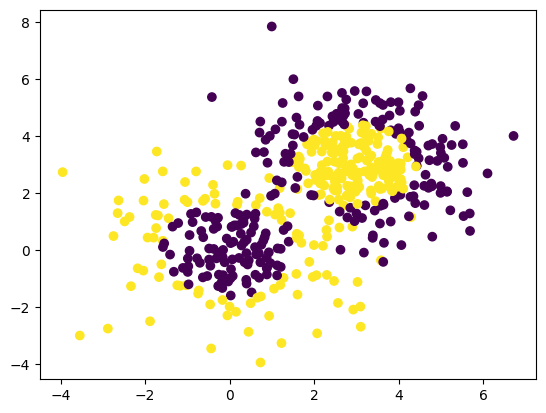

In [32]:
plt.scatter(df['x'],df['y'],c=df['class'])
#By seeing the distribution of dataset,it is difficult to draw a decision boundy to classify this dataset

In [33]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [34]:
x

array([[-3.95001869e+00,  2.74007953e+00],
       [ 1.50221617e-01, -2.15763780e+00],
       [-1.67205033e+00, -9.41519069e-01],
       [ 2.56048303e+00, -1.84657672e+00],
       [-1.72497907e+00,  3.46393036e+00],
       [ 1.89572778e-01,  1.69996229e+00],
       [-3.34372344e-01,  1.02928372e+00],
       [ 3.09811727e+00, -2.68185934e+00],
       [-1.24066342e+00, -1.22723646e+00],
       [-3.78850955e-01,  7.50035894e-01],
       [ 2.92145879e+00, -2.08053008e+00],
       [-2.67496068e-03, -1.97511955e+00],
       [ 7.48777043e-01,  1.94738919e-01],
       [ 1.60339212e+00, -1.55548115e+00],
       [ 4.95746877e-01, -1.85584900e+00],
       [ 2.06773287e+00, -2.91347893e+00],
       [-1.02614929e+00, -1.22721023e+00],
       [-1.05664139e+00,  2.39349225e+00],
       [-1.55651057e+00,  1.61888380e+00],
       [-1.44516496e+00,  1.12363261e+00],
       [ 8.59137508e-02,  2.98575492e-01],
       [ 1.72281294e-01,  1.59733146e+00],
       [ 3.51855148e-01, -4.19513941e-01],
       [ 4.

In [35]:
y

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0.

In [36]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [37]:
#Now we will define a neural network without using batch normalization
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history = model.fit(x,y,epochs = 200 , validation_split = 0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4930 - loss: 1.0854 - val_accuracy: 0.5600 - val_loss: 0.6114
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5411 - loss: 0.9500 - val_accuracy: 0.5600 - val_loss: 0.6120
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5584 - loss: 0.9593 - val_accuracy: 0.5700 - val_loss: 0.6128
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4971 - loss: 0.9659 - val_accuracy: 0.5800 - val_loss: 0.6140
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5721 - loss: 0.8623 - val_accuracy: 0.5800 - val_loss: 0.6155
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5450 - loss: 0.8726 - val_accuracy: 0.5700 - val_loss: 0.6173
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5064 - loss: 0.8607 - val_accuracy: 0.5700 - val_loss: 0.6192
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5538 - loss: 0.8358 - val_accuracy: 0.5600 -

Now we will define the neural network with use of batch normalization as follows:

In [40]:
model2 = Sequential()
model2.add(Dense(3,activation='relu',input_dim=2))
model2.add(BatchNormalization())
model2.add(Dense(2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [41]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
history2 = model2.fit(x,y,epochs = 200 , validation_split = 0.2)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4504 - loss: 0.8968 - val_accuracy: 0.5700 - val_loss: 0.8368
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4542 - loss: 0.8878 - val_accuracy: 0.5600 - val_loss: 0.8110
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4712 - loss: 0.8390 - val_accuracy: 0.5500 - val_loss: 0.7899
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4645 - loss: 0.8046 - val_accuracy: 0.5400 - val_loss: 0.7711
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4282 - loss: 0.9061 - val_accuracy: 0.5200 - val_loss: 0.7543
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4908 - loss: 0.7972 - val_accuracy: 0.4900 - val_loss: 0.7403
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5184 - loss: 0.7612 - val_accuracy: 0.4700 - val_loss: 0.7301
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4607 - loss: 0.7902 - val_accuracy: 0.4300 

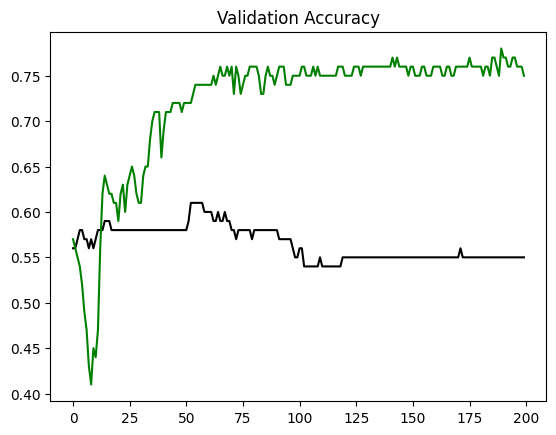

In [43]:
#Now we will plot the validation accuracy of the model without batch
#normalization in bllack and validation accuracy of the model with batch
#normalization in green
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')
plt.title('Validation Accuracy')
plt.show()
#

We can observe that when we used the batch normalization, we got better accuracy on  validation than the model when we didnt use the batch normalization.